In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json
import re
from requests.auth import HTTPBasicAuth
from pandas import json_normalize

In [2]:
pnp_etsy_csv = pd.read_csv("..\data\listings_paper.csv")
pnp_etsy_csv

,Unnamed: 0,listing_id,user_id,shop_id,title,description,state,creation_timestamp,created_timestamp,ending_timestamp,...,file_data,has_variations,should_auto_renew,language,taxonomy_id,production_partners,skus,price.amount,price.divisor,price.currency_code
0,0,236796647,7891149,5627890,Birthday Card - Happy Birthday - Handwritten -...,"Wish your friends, relatives, neighbors, co-wo...",active,1603949423,1603949423,1614493823,...,NaN,False,True,en-US,1264,[],[],250,100,USD
1,1,618131165,14823706,6579872,"Thinking Of You, hand lettered sympathy card w...","Our Thinking Of You, hand lettered luxury gree...",active,1603950621,1603950621,1614495021,...,NaN,False,False,en-US,1285,[],[],550,100,GBP
2,2,647582777,14823706,6579872,"You&#39;ve Got This, hand lettered congratulat...","Our You&#39;ve Got This, hand lettered luxury ...",active,1603968629,1603968629,1614513029,...,NaN,False,True,en-US,1270,[],[],550,100,GBP
3,3,717730423,43040627,9039454,Custom Name Wooden Plank Laser Cut Sign - Lett...,| ITEM DETAILS |\nCustom Wooden Name Plank\nPi...,active,1603984866,1603984866,1614529266,...,NaN,True,True,en-US,1334,[],[],7500,100,USD
4,4,815329154,6027215,5325270,"Cake Topper, Personalised Hand Lettered Handma...",P E R S O N A L I S E D \nC A K E \nT O P P E ...,active,1603997481,1603997481,1614541881,...,NaN,True,True,en-US,9122,[],[],1350,100,GBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40295,40295,587947899,77824342,12134916,Relax svg Bath Tray svg Bath Caddie svg Bathro...,Homeberries Relax Bath Tray Bundle. These are ...,active,1652664609,1652664609,1663291809,...,3 ZIP,False,True,en-US,6598,[],[],595,100,USD
40296,40296,754728236,14200159,13061248,You Complete Me - A2 Greeting Card,You complete me - the cutest little puzzle pie...,active,1652665246,1652665246,1663292446,...,NaN,False,True,en-US,1261,[],[],500,100,USD
40297,40297,1232868225,354433261,24819455,Thank You • Greeting Cards • 5 pack,This greeting card is perfect for showing some...,active,1652665598,1652665598,1663292798,...,NaN,False,True,en-US,1265,[],[],2000,100,USD
40298,40298,1232628573,354433261,24819455,Graduation • Greeting Card • 5 pack,This greeting card is perfect for showing some...,active,1652665598,1652665598,1663292798,...,NaN,True,True,en-US,1265,[],[],2000,100,USD


In [3]:
home_etsy_csv = pd.read_csv("..\data\listings_home.csv")
home_etsy_csv

,Unnamed: 0,listing_id,user_id,shop_id,title,description,state,creation_timestamp,created_timestamp,ending_timestamp,...,file_data,has_variations,should_auto_renew,language,taxonomy_id,production_partners,skus,price.amount,price.divisor,price.currency_code
0,0,740223621,19840612,6766412,If You Want to Change the World Go Home and Lo...,"“If you want to change the world, go home and ...",active,1603860710,1603860710,1614491510,...,NaN,False,False,en-US,2078,[],[],1999,100,USD
1,1,490998782,38954524,8718556,"Digitized Art (not a mug): Love, For God so lo...","IMPORTANT NOTE: THIS IS NOT A MUG FOR SALE, B...",active,1603901527,1603901527,1614532327,...,2 PDF,False,True,en-US,119,[],[],400,100,USD
2,2,518644764,101112796,14333509,They Broke Bread Sign - Acts 2:46 - Wood Sign ...,~BROKE BREAD SIGN~ Wooden Decorative Inspirati...,active,1603902858,1603902858,1614533658,...,NaN,True,True,en-US,2844,[],[],10500,100,USD
3,3,644931979,162226534,18110774,Scripture Wall Art Bible Verse Wall Art Bible ...,Psalm 46:10 Bible Quote Print Bible Verses Pri...,active,1603914077,1603914077,1614544877,...,"2 ZIP, 1 JPG, 1 PDF",False,True,en-US,2078,[],[],699,100,CAD
4,4,581224258,121658751,15800102,Hand Lettered Word of the Year - Service - IN...,Hand Lettered Word of the Year - Service - INS...,active,1603928444,1603928444,1614559244,...,2 PDF,False,True,en-US,2078,[],[],500,100,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22895,22895,261388948,66332651,11122726,"Life is Beautiful Downloadable Print, Gold Let...",Downloadable digital print only. No items will...,active,1652245819,1652245819,1662873019,...,"1 JPG, 1 PNG",False,True,en-US,2078,[],[],450,100,USD
22896,22896,677597909,164992388,18247331,Cupid&#39;s Sparrow Hand-lettered watercolor a...,One of many Michael Scott quotes where he&#39;...,active,1652246409,1652246409,1662873609,...,NaN,True,True,en-US,2844,[],[],1600,100,USD
22897,22897,1039397866,8775449,13286623,Don&#39;t stress over what you can&#39;t contr...,DON&#39;T STRESS OVER WHAT YOU CAN&#39;T CONTR...,active,1652248209,1652248209,1662875409,...,"1 JPG, 1 PDF",False,True,en-US,2078,[],[],500,100,AUD
22898,22898,209153170,39086621,8734605,"Inspirational Wall Art, No One Can Make You Fe...",&quot;No one can make you feel inferior withou...,active,1652248220,1652248220,1662875420,...,NaN,True,True,en-US,119,[],[],1495,100,USD


In [4]:
wed_etsy_csv = pd.read_csv("..\data\listings_wed.csv")
wed_etsy_csv

,Unnamed: 0,listing_id,user_id,shop_id,title,description,state,creation_timestamp,created_timestamp,ending_timestamp,...,file_data,has_variations,should_auto_renew,language,taxonomy_id,production_partners,skus,price.amount,price.divisor,price.currency_code
0,0,119919686,17415724,7371868,Dom Loves Mary Pro Calligraphy Font,Dom Loves Mary Pro Calligraphy Font is three ...,active,1604090463,1604090463,1614548463,...,1 ZIP,False,True,en-US,1675,[],[],6999,100,USD
1,1,473572414,17098880,6823707,Flourished Calligraphy Place Card | Wedding | ...,Professionally hand-lettered calligraphy place...,active,1604102452,1604102452,1614560452,...,NaN,True,True,en-US,6056,[],[],100,100,USD
2,2,802444924,18096930,15943136,Custom Envelope Calligraphy Addressing // for ...,Custom envelope addressing in traditional call...,active,1622521881,1622521881,1633062681,...,NaN,True,True,en-US,1676,[],[],200,100,USD
3,3,255960471,66215956,11630683,Envelope Address Calligraphy // Handwritten Ad...,Calligraphy / Hand lettered name(s) and addres...,active,1627630835,1627630835,1638261635,...,NaN,True,True,en-US,1676,[],[],300,100,USD
4,4,584087059,100636681,14008975,Printable OR Printed Picture Thank You Postcar...,Printable OR Printed Photo Thank You Postcards...,active,1635463942,1635463942,1646094742,...,NaN,True,False,en-US,1679,[],[],1848,100,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617,5617,1177227945,19098480,16482469,Laser Cut Acrylic Name | Custom Hand Lettered ...,DETAILS:\nLevel up your place settings with th...,active,1646545630,1646545630,1657082830,...,NaN,True,True,en-US,6056,[],[],250,100,USD
5618,5618,624644923,44787026,9201026,"Marble Hexagon Escort Cards, Modern Wedding, M...",**Please do not purchase this listing. Message...,active,1646572830,1646572830,1657110030,...,NaN,True,True,en-US,6056,[],[],260,100,USD
5619,5619,597614189,7449966,5557878,"Let&#39;s Celebrate, Congrats, Congratulations...",Let&#39;s celebrate! It&#39;s time to celebrat...,active,1646575863,1646575863,1657113063,...,NaN,False,True,en-US,2178,[],[],500,100,USD
5620,5620,781688653,106564559,18945582,"Valentine&#39;s Day, Hand Lettered Greeting Card",&quot;Happy Valentine&#39;s Day&quot;\n\nSend ...,active,1646581831,1646581831,1657119031,...,NaN,True,False,en-US,1261,[],[],600,100,CAD


In [5]:
pdList = [pnp_etsy_csv, home_etsy_csv, wed_etsy_csv]  # List of your dataframes
new_df = pd.concat(pdList)
new_df

,Unnamed: 0,listing_id,user_id,shop_id,title,description,state,creation_timestamp,created_timestamp,ending_timestamp,...,file_data,has_variations,should_auto_renew,language,taxonomy_id,production_partners,skus,price.amount,price.divisor,price.currency_code
0,0,236796647,7891149,5627890,Birthday Card - Happy Birthday - Handwritten -...,"Wish your friends, relatives, neighbors, co-wo...",active,1603949423,1603949423,1614493823,...,NaN,False,True,en-US,1264,[],[],250,100,USD
1,1,618131165,14823706,6579872,"Thinking Of You, hand lettered sympathy card w...","Our Thinking Of You, hand lettered luxury gree...",active,1603950621,1603950621,1614495021,...,NaN,False,False,en-US,1285,[],[],550,100,GBP
2,2,647582777,14823706,6579872,"You&#39;ve Got This, hand lettered congratulat...","Our You&#39;ve Got This, hand lettered luxury ...",active,1603968629,1603968629,1614513029,...,NaN,False,True,en-US,1270,[],[],550,100,GBP
3,3,717730423,43040627,9039454,Custom Name Wooden Plank Laser Cut Sign - Lett...,| ITEM DETAILS |\nCustom Wooden Name Plank\nPi...,active,1603984866,1603984866,1614529266,...,NaN,True,True,en-US,1334,[],[],7500,100,USD
4,4,815329154,6027215,5325270,"Cake Topper, Personalised Hand Lettered Handma...",P E R S O N A L I S E D \nC A K E \nT O P P E ...,active,1603997481,1603997481,1614541881,...,NaN,True,True,en-US,9122,[],[],1350,100,GBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617,5617,1177227945,19098480,16482469,Laser Cut Acrylic Name | Custom Hand Lettered ...,DETAILS:\nLevel up your place settings with th...,active,1646545630,1646545630,1657082830,...,NaN,True,True,en-US,6056,[],[],250,100,USD
5618,5618,624644923,44787026,9201026,"Marble Hexagon Escort Cards, Modern Wedding, M...",**Please do not purchase this listing. Message...,active,1646572830,1646572830,1657110030,...,NaN,True,True,en-US,6056,[],[],260,100,USD
5619,5619,597614189,7449966,5557878,"Let&#39;s Celebrate, Congrats, Congratulations...",Let&#39;s celebrate! It&#39;s time to celebrat...,active,1646575863,1646575863,1657113063,...,NaN,False,True,en-US,2178,[],[],500,100,USD
5620,5620,781688653,106564559,18945582,"Valentine&#39;s Day, Hand Lettered Greeting Card",&quot;Happy Valentine&#39;s Day&quot;\n\nSend ...,active,1646581831,1646581831,1657119031,...,NaN,True,False,en-US,1261,[],[],600,100,CAD


In [6]:
len(new_df['listing_id'].unique())

24441

In [7]:
len(new_df['shop_id'].unique())

3935

In [8]:
new_df['creation_timestamp'] = pd.to_datetime(new_df['creation_timestamp'], unit='s')

new_df['created_timestamp'] = pd.to_datetime(new_df['created_timestamp'], unit='s')

new_df['ending_timestamp'] = pd.to_datetime(new_df['ending_timestamp'], unit='s')

new_df['original_creation_timestamp'] = pd.to_datetime(new_df['original_creation_timestamp'], unit='s')

new_df['last_modified_timestamp'] = pd.to_datetime(new_df['last_modified_timestamp'], unit='s')

new_df['updated_timestamp'] = pd.to_datetime(new_df['updated_timestamp'], unit='s')

new_df['state_timestamp'] = pd.to_datetime(new_df['state_timestamp'], unit='s')
new_df.head()

,Unnamed: 0,listing_id,user_id,shop_id,title,description,state,creation_timestamp,created_timestamp,ending_timestamp,...,file_data,has_variations,should_auto_renew,language,taxonomy_id,production_partners,skus,price.amount,price.divisor,price.currency_code
0,0,236796647,7891149,5627890,Birthday Card - Happy Birthday - Handwritten -...,"Wish your friends, relatives, neighbors, co-wo...",active,2020-10-29 05:30:23,2020-10-29 05:30:23,2021-02-28 06:30:23,...,NaN,False,True,en-US,1264,[],[],250,100,USD
1,1,618131165,14823706,6579872,"Thinking Of You, hand lettered sympathy card w...","Our Thinking Of You, hand lettered luxury gree...",active,2020-10-29 05:50:21,2020-10-29 05:50:21,2021-02-28 06:50:21,...,NaN,False,False,en-US,1285,[],[],550,100,GBP
2,2,647582777,14823706,6579872,"You&#39;ve Got This, hand lettered congratulat...","Our You&#39;ve Got This, hand lettered luxury ...",active,2020-10-29 10:50:29,2020-10-29 10:50:29,2021-02-28 11:50:29,...,NaN,False,True,en-US,1270,[],[],550,100,GBP
3,3,717730423,43040627,9039454,Custom Name Wooden Plank Laser Cut Sign - Lett...,| ITEM DETAILS |\nCustom Wooden Name Plank\nPi...,active,2020-10-29 15:21:06,2020-10-29 15:21:06,2021-02-28 16:21:06,...,NaN,True,True,en-US,1334,[],[],7500,100,USD
4,4,815329154,6027215,5325270,"Cake Topper, Personalised Hand Lettered Handma...",P E R S O N A L I S E D \nC A K E \nT O P P E ...,active,2020-10-29 18:51:21,2020-10-29 18:51:21,2021-02-28 19:51:21,...,NaN,True,True,en-US,9122,[],[],1350,100,GBP


In [9]:
new_df=new_df.reset_index()

In [10]:
new_df

,index,Unnamed: 0,listing_id,user_id,shop_id,title,description,state,creation_timestamp,created_timestamp,...,file_data,has_variations,should_auto_renew,language,taxonomy_id,production_partners,skus,price.amount,price.divisor,price.currency_code
0,0,0,236796647,7891149,5627890,Birthday Card - Happy Birthday - Handwritten -...,"Wish your friends, relatives, neighbors, co-wo...",active,2020-10-29 05:30:23,2020-10-29 05:30:23,...,NaN,False,True,en-US,1264,[],[],250,100,USD
1,1,1,618131165,14823706,6579872,"Thinking Of You, hand lettered sympathy card w...","Our Thinking Of You, hand lettered luxury gree...",active,2020-10-29 05:50:21,2020-10-29 05:50:21,...,NaN,False,False,en-US,1285,[],[],550,100,GBP
2,2,2,647582777,14823706,6579872,"You&#39;ve Got This, hand lettered congratulat...","Our You&#39;ve Got This, hand lettered luxury ...",active,2020-10-29 10:50:29,2020-10-29 10:50:29,...,NaN,False,True,en-US,1270,[],[],550,100,GBP
3,3,3,717730423,43040627,9039454,Custom Name Wooden Plank Laser Cut Sign - Lett...,| ITEM DETAILS |\nCustom Wooden Name Plank\nPi...,active,2020-10-29 15:21:06,2020-10-29 15:21:06,...,NaN,True,True,en-US,1334,[],[],7500,100,USD
4,4,4,815329154,6027215,5325270,"Cake Topper, Personalised Hand Lettered Handma...",P E R S O N A L I S E D \nC A K E \nT O P P E ...,active,2020-10-29 18:51:21,2020-10-29 18:51:21,...,NaN,True,True,en-US,9122,[],[],1350,100,GBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68817,5617,5617,1177227945,19098480,16482469,Laser Cut Acrylic Name | Custom Hand Lettered ...,DETAILS:\nLevel up your place settings with th...,active,2022-03-06 05:47:10,2022-03-06 05:47:10,...,NaN,True,True,en-US,6056,[],[],250,100,USD
68818,5618,5618,624644923,44787026,9201026,"Marble Hexagon Escort Cards, Modern Wedding, M...",**Please do not purchase this listing. Message...,active,2022-03-06 13:20:30,2022-03-06 13:20:30,...,NaN,True,True,en-US,6056,[],[],260,100,USD
68819,5619,5619,597614189,7449966,5557878,"Let&#39;s Celebrate, Congrats, Congratulations...",Let&#39;s celebrate! It&#39;s time to celebrat...,active,2022-03-06 14:11:03,2022-03-06 14:11:03,...,NaN,False,True,en-US,2178,[],[],500,100,USD
68820,5620,5620,781688653,106564559,18945582,"Valentine&#39;s Day, Hand Lettered Greeting Card",&quot;Happy Valentine&#39;s Day&quot;\n\nSend ...,active,2022-03-06 15:50:31,2022-03-06 15:50:31,...,NaN,True,False,en-US,1261,[],[],600,100,CAD


In [11]:
no_dup_listing = new_df.drop_duplicates(subset=['listing_id', 'shop_id', 'taxonomy_id'])
no_dup_listing = no_dup_listing.reset_index(drop=True)
no_dup_listing['listing_id'].value_counts()

236796647     1
865515614     1
910476597     1
910443365     1
910469241     1
             ..
254225214     1
1159884591    1
620019978     1
978606676     1
1160855964    1
Name: listing_id, Length: 24441, dtype: int64

In [12]:
no_dup_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24441 entries, 0 to 24440
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           24441 non-null  int64         
 1   Unnamed: 0                      24441 non-null  int64         
 2   listing_id                      24441 non-null  int64         
 3   user_id                         24441 non-null  int64         
 4   shop_id                         24441 non-null  int64         
 5   title                           24441 non-null  object        
 6   description                     24441 non-null  object        
 7   state                           24441 non-null  object        
 8   creation_timestamp              24441 non-null  datetime64[ns]
 9   created_timestamp               24441 non-null  datetime64[ns]
 10  ending_timestamp                24441 non-null  datetime64[ns]
 11  or

In [23]:
select_columns = no_dup_listing[["creation_timestamp","shop_id", "listing_id", 'url',  'num_favorers', 'tags',
                      'who_made', "listing_type", 'price.amount', 'materials' ]]
select_columns.reset_index(drop=True)
select_columns#.info()

,creation_timestamp,shop_id,listing_id,url,num_favorers,tags,who_made,listing_type,price.amount,materials
0,2020-10-29 05:30:23,5627890,236796647,https://www.etsy.com/listing/236796647/birthda...,21,"'Birthday Card', 'Happy Birthday', 'Handwritte...",i_did,physical,250,"['paper', 'envelope', 'hand lettered calligrap..."
1,2020-10-29 05:50:21,6579872,618131165,https://www.etsy.com/listing/618131165/thinkin...,3,"'hand lettered', 'grief and mourning', 'greeti...",i_did,physical,550,"['matte card', 'grey luxury envelope']"
2,2020-10-29 10:50:29,6579872,647582777,https://www.etsy.com/listing/647582777/youve-g...,11,"'congrats card', 'congratulations', 'engagemen...",i_did,physical,550,"['matte card', 'kraft envelope']"
3,2020-10-29 15:21:06,9039454,717730423,https://www.etsy.com/listing/717730423/custom-...,12,"'custom name sign', 'house warming gift', 'las...",i_did,physical,7500,"['mdf wood', 'paint', 'glue', 'stained wood pl..."
4,2020-10-29 18:51:21,5325270,815329154,https://www.etsy.com/listing/815329154/cake-to...,1,"'cake topper', 'cake topper birthday', 'birthd...",i_did,physical,1350,['Paper']
...,...,...,...,...,...,...,...,...,...,...
24436,2022-06-21 18:36:14,22430746,824624370,https://www.etsy.com/listing/824624370/hand-le...,682,"'vellum', 'wedding', 'calligraphy', 'hand lett...",i_did,physical,239,"['vellum', 'chiffon ribbon', 'ink']"
24437,2022-06-21 18:47:34,6363955,490919268,https://www.etsy.com/listing/490919268/round-r...,1824,"'return address stamp', 'wedding invitation', ...",i_did,physical,3200,[]
24438,2022-06-21 18:59:35,5311677,1079434119,https://www.etsy.com/listing/1079434119/kimber...,160,"'wedding invitation', 'modern invitation', 'we...",i_did,physical,500,"['120lb textured white card stock', 'wedding i..."
24439,2022-06-21 19:02:58,10514292,221698849,https://www.etsy.com/listing/221698849/physica...,1203,"'watercolor lettering', 'watercolor print', 'h...",i_did,physical,1200,[]


In [25]:
select_columns['price_amount'] = select_columns['price.amount']/100

C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_9872/752776558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_columns['price_amount'] = select_columns['price.amount']/100


In [28]:
select_columns['materials'] = select_columns['materials'].str.replace('[','')
select_columns['materials'] = select_columns['materials'].str.replace(']','')

C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_9872/2173485050.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  select_columns['materials'] = select_columns['materials'].str.replace('[','')
C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_9872/2173485050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_columns['materials'] = select_columns['materials'].str.replace('[','')
C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_9872/2173485050.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions

In [30]:
select_columns#.info()

,creation_timestamp,shop_id,listing_id,url,num_favorers,tags,who_made,listing_type,price.amount,materials,price_amount
0,2020-10-29 05:30:23,5627890,236796647,https://www.etsy.com/listing/236796647/birthda...,21,"'Birthday Card', 'Happy Birthday', 'Handwritte...",i_did,physical,250,"'paper', 'envelope', 'hand lettered calligraph...",2.50
1,2020-10-29 05:50:21,6579872,618131165,https://www.etsy.com/listing/618131165/thinkin...,3,"'hand lettered', 'grief and mourning', 'greeti...",i_did,physical,550,"'matte card', 'grey luxury envelope'",5.50
2,2020-10-29 10:50:29,6579872,647582777,https://www.etsy.com/listing/647582777/youve-g...,11,"'congrats card', 'congratulations', 'engagemen...",i_did,physical,550,"'matte card', 'kraft envelope'",5.50
3,2020-10-29 15:21:06,9039454,717730423,https://www.etsy.com/listing/717730423/custom-...,12,"'custom name sign', 'house warming gift', 'las...",i_did,physical,7500,"'mdf wood', 'paint', 'glue', 'stained wood pla...",75.00
4,2020-10-29 18:51:21,5325270,815329154,https://www.etsy.com/listing/815329154/cake-to...,1,"'cake topper', 'cake topper birthday', 'birthd...",i_did,physical,1350,'Paper',13.50
...,...,...,...,...,...,...,...,...,...,...,...
24436,2022-06-21 18:36:14,22430746,824624370,https://www.etsy.com/listing/824624370/hand-le...,682,"'vellum', 'wedding', 'calligraphy', 'hand lett...",i_did,physical,239,"'vellum', 'chiffon ribbon', 'ink'",2.39
24437,2022-06-21 18:47:34,6363955,490919268,https://www.etsy.com/listing/490919268/round-r...,1824,"'return address stamp', 'wedding invitation', ...",i_did,physical,3200,,32.00
24438,2022-06-21 18:59:35,5311677,1079434119,https://www.etsy.com/listing/1079434119/kimber...,160,"'wedding invitation', 'modern invitation', 'we...",i_did,physical,500,"'120lb textured white card stock', 'wedding in...",5.00
24439,2022-06-21 19:02:58,10514292,221698849,https://www.etsy.com/listing/221698849/physica...,1203,"'watercolor lettering', 'watercolor print', 'h...",i_did,physical,1200,,12.00


In [31]:
faves_above_100 = select_columns[select_columns["num_favorers"] > 100]
faves_above_100.reset_index(drop=True)

,creation_timestamp,shop_id,listing_id,url,num_favorers,tags,who_made,listing_type,price.amount,materials,price_amount
0,2021-05-30 04:51:19,9039454,521663901,https://www.etsy.com/listing/521663901/custom-...,277,"'cake decoration', 'hand drawn', 'calligraphy'...",i_did,physical,4700,"'Lots of Love', 'Laser Cut', 'Shellac', 'Paint...",47.00
1,2021-07-29 16:40:05,9039454,252085441,https://www.etsy.com/listing/252085441/better-...,129,"'weddings', 'cake decoration', 'hand drawn', '...",i_did,physical,2500,"'Hand drawn', 'MDF Wood', 'Paint', 'Shellac', ...",25.00
2,2021-10-28 04:31:30,9039454,291145415,https://www.etsy.com/listing/291145415/100-cre...,104,"'100 day cake topper', '100th day', 'happy 100...",i_did,physical,2500,,25.00
3,2021-10-29 07:03:59,13156236,574355040,https://www.etsy.com/listing/574355040/digital...,182,"'True Type Font', 'typeface', 'font', 'digital...",i_did,download,1300,"'true type', 'open type', 'ttf', 'otf', 'zip',...",13.00
4,2021-11-01 02:40:35,10974574,229712953,https://www.etsy.com/listing/229712953/abigail...,260,"'brush font', 'script', 'cursive', 'calligraph...",i_did,download,800,"'1 zip', 'ttf and otf', 'commercial license', ...",8.00
...,...,...,...,...,...,...,...,...,...,...,...
1239,2022-06-21 18:35:16,22057468,820878048,https://www.etsy.com/listing/820878048/calligr...,498,"'name cards', 'wedding decor', 'event decor', ...",i_did,physical,60,,0.60
1240,2022-06-21 18:36:14,22430746,824624370,https://www.etsy.com/listing/824624370/hand-le...,682,"'vellum', 'wedding', 'calligraphy', 'hand lett...",i_did,physical,239,"'vellum', 'chiffon ribbon', 'ink'",2.39
1241,2022-06-21 18:47:34,6363955,490919268,https://www.etsy.com/listing/490919268/round-r...,1824,"'return address stamp', 'wedding invitation', ...",i_did,physical,3200,,32.00
1242,2022-06-21 18:59:35,5311677,1079434119,https://www.etsy.com/listing/1079434119/kimber...,160,"'wedding invitation', 'modern invitation', 'we...",i_did,physical,500,"'120lb textured white card stock', 'wedding in...",5.00


In [32]:
above_100_csv = pd.read_csv("..\data\above_100.csv")
above_100_csv

OSError: [Errno 22] Invalid argument: '..\\data\x07bove_100.csv'

In [16]:
no_dup_listing['tags'] = no_dup_listing['tags'].str.replace('[','')
no_dup_listing['tags'] = no_dup_listing['tags'].str.replace(']','')
#no_dup_listing['tags'] = no_dup_listing['tags'].str.replace("'",'')
#no_dup_listing['tags'] = no_dup_listing['tags'].str.replace("'",'')

C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_9872/3783390953.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  no_dup_listing['tags'] = no_dup_listing['tags'].str.replace('[','')
C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_9872/3783390953.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  no_dup_listing['tags'] = no_dup_listing['tags'].str.replace(']','')


In [17]:
tags=pd.DataFrame(no_dup_listing['tags'])
tags

,tags
0,"'Birthday Card', 'Happy Birthday', 'Handwritte..."
1,"'hand lettered', 'grief and mourning', 'greeti..."
2,"'congrats card', 'congratulations', 'engagemen..."
3,"'custom name sign', 'house warming gift', 'las..."
4,"'cake topper', 'cake topper birthday', 'birthd..."
...,...
24436,"'vellum', 'wedding', 'calligraphy', 'hand lett..."
24437,"'return address stamp', 'wedding invitation', ..."
24438,"'wedding invitation', 'modern invitation', 'we..."
24439,"'watercolor lettering', 'watercolor print', 'h..."


In [18]:
#tags.to_csv('tags_only.csv')

In [ ]:
#new_df.to_csv('new_df.csv')

In [ ]:
#no_dup_listing.to_csv('no_dup_listing.csv')

In [19]:
import seaborn as sns
import numpy as np

C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_9872/1290089055.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


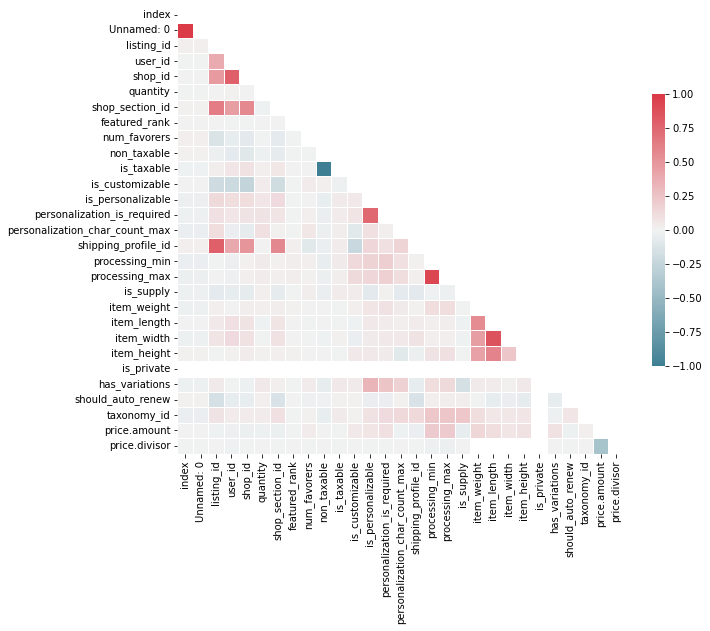

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
corr = no_dup_listing.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
          square=True, linewidths=.5, cbar_kws={"shrink": .5});